<a href="https://colab.research.google.com/github/aa57c/CS_5588_DS_Capstone_Assignments/blob/assignment3_1/Deep_Learning_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingClassifier

Import First Dataset and Print Correlation Matrix: [Dataset Link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [ ]:
# Load dataset
health_indicators_dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

health_indicators_dataset = health_indicators_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Rename the outcome column to 'Diabetes_Status'

health_indicators_dataset.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)

# Rename the 'Sex' column to 'Gender
health_indicators_dataset.rename(columns={'Sex': 'Gender'}, inplace=True)

# Rename the 'PhysActivity" column to "PhysicallyActive"
health_indicators_dataset.rename(columns={'PhysActivity': 'PhysicallyActive'}, inplace=True)

# Rename the "Smoker" and "HvyHvyAlcoholConsump" to "Smoking" and "Alcohol" respectively
health_indicators_dataset.rename(columns={'Smoker': 'Smoking', 'HvyAlcoholConsump': 'Alcohol'}, inplace=True)
# Print correlation matrix
correlation_matrix = health_indicators_dataset.corr()
print(correlation_matrix)

# printing the head of the dataset
print(health_indicators_dataset.head())

<ipython-input-3-122002b8161f>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  health_indicators_dataset = health_indicators_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)


                      Diabetes_Status    HighBP  HighChol  CholCheck  \
Diabetes_Status              1.000000  0.269086  0.207435   0.072222   
HighBP                       0.269086  1.000000  0.283285   0.099415   
HighChol                     0.207435  0.283285  1.000000   0.098558   
CholCheck                    0.072222  0.099415  0.098558   1.000000   
BMI                          0.211801  0.213951  0.087188   0.036226   
Smoking                      0.058910  0.099570  0.082402  -0.012874   
Stroke                       0.102715  0.126594  0.085947   0.025386   
HeartDiseaseorAttack         0.177432  0.203191  0.170668   0.043867   
PhysicallyActive            -0.151657 -0.132253 -0.076648  -0.008454   
Fruits                      -0.030489 -0.031542 -0.024408   0.024951   
Veggies                     -0.047853 -0.036013 -0.031931   0.017397   
Alcohol                     -0.058904 -0.003424 -0.014275  -0.028933   
AnyHealthcare                0.026366  0.049833  0.056505   0.15

Import Gestational Diabetes Dataset and Print Out Correlation Matrix: [Dataset Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [ ]:
# load dataset
gestational_diabetes_dataset = pd.read_csv('gestational_diabetes_dataset.csv')

gestational_diabetes_dataset = gestational_diabetes_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Rename the outcome column to 'Diabetes_Status' and map values of 1 to 3
gestational_diabetes_dataset.rename(columns={'Outcome': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset['Diabetes_Status'] = gestational_diabetes_dataset['Diabetes_Status'].map({0: 0, 1: 3})

# print correlation matrix
correlation_matrix = gestational_diabetes_dataset.corr()
print(correlation_matrix)

# Define a function to classify BP levels based only on Diastolic BP
def classify_bp(row):
    dia_bp = row['BloodPressure']

    if dia_bp < 60:
        return 0  # Low BP
    elif 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column based on diastolic pressure
gestational_diabetes_dataset['BPLevel'] = gestational_diabetes_dataset.apply(classify_bp, axis=1)

# Remove the 'Dia BP' column (and 'Sys BP' if no longer needed)
gestational_diabetes_dataset.drop(['BloodPressure'], axis=1, inplace=True)


# printing the head of the dataset
print(gestational_diabetes_dataset.head())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Diabetes_Status              0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<ipython-input-4-45f0a2e60882>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gestational_diabetes_dataset = gestational_diabetes_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Import Another Dataset with more samples: [Dataset Link](https://github.com/steve-zeyu-zhang/DiabetesDiagnosis/blob/main/data/BIT_2019.csv)

In [ ]:
# import dataset
bit_2019_dataset = pd.read_csv('BIT_2019.csv')

bit_2019_dataset = bit_2019_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# rename column "highBP" to HighBP
bit_2019_dataset.rename(columns={'highBP': 'HighBP'}, inplace=True)

# rename column "Pregancies" to "Pregnancies"
bit_2019_dataset.rename(columns={'Pregancies': 'Pregnancies'}, inplace=True)

bit_2019_dataset['BPLevel'] = bit_2019_dataset['BPLevel'].str.lower()
# Strip any leading or trailing whitespace in the 'BPLevel' column
bit_2019_dataset['BPLevel'] = bit_2019_dataset['BPLevel'].str.strip()

# Function to classify diabetes status based on Diabetic, Pdiabetes, and Pregancies columns
def classify_diabetes(row):
    if row['Diabetic'] == 'no' and row['Pdiabetes'] == 0:
        return 'No Diabetes'
    elif row['Pdiabetes'] == 1:
        return 'Prediabetes'
    elif row['Diabetic'] == 'yes' and row['Pregnancies'] == 0:
        return 'Type-2 Diabetes'
    elif row['Diabetic'] == 'yes' and row['Pregnancies'] > 0 and row['Gender'] == 0: # only females
        return 'Gestational Diabetes'
    else:
        return 'Unknown'

# Fill missing values in 'Pdiabetes' and 'Diabetic' columns
bit_2019_dataset['Pdiabetes'].fillna('0', inplace=True)  # Assuming no prediabetes for missing values
bit_2019_dataset['Diabetic'].fillna('no', inplace=True)  # Assuming no diabetes for missing values

# Standardize the 'Pdiabetes' column to binary format (0 for no, 1 for yes)
bit_2019_dataset['Pdiabetes'] = bit_2019_dataset['Pdiabetes'].replace({'yes': 1, 'no': 0, '0': 0}).astype(int)

# Apply the classification function to create the target column 'Diabetes_Status'
bit_2019_dataset['Diabetes_Status'] = bit_2019_dataset.apply(classify_diabetes, axis=1)

# Check the distribution of the newly created 'Diabetes_Status' column
print(bit_2019_dataset['Diabetes_Status'].value_counts())

# Drop rows where 'Diabetes_Status' is 'Unknown'
bit_2019_dataset = bit_2019_dataset[bit_2019_dataset['Diabetes_Status'] != 'Unknown']


# Define a function to convert age ranges to numeric values (e.g., using the midpoint of the range)
def convert_age_range(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        age_min, age_max = age_range.split('-')
        return (int(age_min) + int(age_max)) // 2
    else:
        return pd.to_numeric(age_range, errors='coerce')  # Handle any non-range values

# Apply the function to the Age column
bit_2019_dataset['Age'] = bit_2019_dataset['Age'].apply(convert_age_range)

# Identify all columns with 'object' dtype (categorical columns)
categorical_columns = bit_2019_dataset.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    bit_2019_dataset[column] = label_encoder.fit_transform(bit_2019_dataset[column])
    # Print the mapping of original values to encoded values
    print(f"Mapping for column '{column}':")
    for i, item in enumerate(label_encoder.classes_):
        print(f"{item} --> {i}")
    print()  # Just to add a blank line between mappings

# print correlation matrix
correlation_matrix = bit_2019_dataset.corr()
print(correlation_matrix)

# printing the head of the dataset
print(bit_2019_dataset.head())

Diabetes_Status
No Diabetes        684
Type-2 Diabetes    188
Unknown             66
Prediabetes         14
Name: count, dtype: int64
Mapping for column 'Gender':
Female --> 0
Male --> 1

Mapping for column 'Family_Diabetes':
no --> 0
yes --> 1

Mapping for column 'HighBP':
no --> 0
yes --> 1

Mapping for column 'PhysicallyActive':
less than half an hr --> 0
more than half an hr --> 1
none --> 2
one hr or more --> 3

Mapping for column 'Smoking':
no --> 0
yes --> 1

Mapping for column 'Alcohol':
no --> 0
yes --> 1

Mapping for column 'RegularMedicine':
no --> 0
yes --> 1

Mapping for column 'JunkFood':
always --> 0
occasionally --> 1
often --> 2
very often --> 3

Mapping for column 'Stress':
always --> 0
not at all --> 1
sometimes --> 2
very often --> 3

Mapping for column 'BPLevel':
high --> 0
low --> 1
normal --> 2

Mapping for column 'UriationFreq':
not much --> 0
quite often --> 1

Mapping for column 'Diabetic':
no --> 0
yes --> 1

Mapping for column 'Diabetes_Status':
No Diabetes 

<ipython-input-5-bccfbb098dcd>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bit_2019_dataset = bit_2019_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-5-bccfbb098dcd>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bit_2019_dataset['Pdiabetes'].fillna('0', inplace=True)  # Assuming no prediabetes for missing values
<ipython-input-5-bccfbb098dcd>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignm

Import Another Dataset for Gestational Diabetes Classification: [Dataset Link](https://www.kaggle.com/datasets/sumathisanthosh/gestational-diabetes-mellitus-gdm-data-set?select=Gestational+Diabetic+Dat+Set.xlsx)

In [ ]:
# import dataset
gestational_diabetes_dataset2 = pd.read_excel('gestational_diabetes_dataset2.xlsx')

gestational_diabetes_dataset2 = gestational_diabetes_dataset2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# print out correlation matrix
correlation_matrix = gestational_diabetes_dataset2.corr()
print(correlation_matrix)

# printing the head of the dataset
print(gestational_diabetes_dataset2.head())

# drop columns that are unnecessary for training
columns_to_drop = ["Case Number", "OGTT", "HDL", "Hemoglobin"]
gestational_diabetes_dataset2.drop(columns=columns_to_drop, inplace=True)

# Rename "No of Pregnancy" column to "Pregnancies", "Class Label(GDM /Non GDM)" to "Diabetes_Status", "Prediabetes" column to "Pdiabetes", "Family History" to "Family_Diabetes"
gestational_diabetes_dataset2.rename(columns={'No of Pregnancy': 'Pregnancies'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Class Label(GDM /Non GDM)': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Prediabetes': 'Pdiabetes'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Family History': 'Family_Diabetes'}, inplace=True)


gestational_diabetes_dataset2['Diabetes_Status'] = gestational_diabetes_dataset2['Diabetes_Status'].map({0: 0, 1: 3})

def classify_bp(row):
    sys_bp = row['Sys BP']
    dia_bp = row['Dia BP']

    if sys_bp < 90 or dia_bp < 60:
        return 0  # Low BP
    elif 90 <= sys_bp <= 120 and 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column
gestational_diabetes_dataset2['BPLevel'] = gestational_diabetes_dataset2.apply(classify_bp, axis=1)

# Remove the 'Sys BP' and 'Dia BP' columns
gestational_diabetes_dataset2.drop(['Sys BP', 'Dia BP'], axis=1, inplace=True)

print(gestational_diabetes_dataset2.head())



                                 Case Number       Age  No of Pregnancy  \
Case Number                         1.000000  0.389118         0.250554   
Age                                 0.389118  1.000000         0.262048   
No of Pregnancy                     0.250554  0.262048         1.000000   
Gestation in previous Pregnancy     0.376781  0.327148         0.669666   
BMI                                 0.698480  0.516200         0.084370   
HDL                                -0.507670 -0.444572         0.011123   
Family History                      0.150812  0.298882         0.012854   
unexplained prenetal loss           0.147234  0.183008         0.195286   
Large Child or Birth Default        0.365506  0.132220         0.295575   
PCOS                                0.585108  0.425936         0.165494   
Sys BP                              0.642472  0.619515         0.368070   
Dia BP                              0.517167  0.481878         0.144426   
OGTT                     

<ipython-input-6-c348c16e5f4a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gestational_diabetes_dataset2 = gestational_diabetes_dataset2.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Separating all datasets into 2 different ones: one for female samples and one for male samples

In [ ]:
# Separating datasets into male and female sample categories

# female_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 0], health_indicators_dataset[health_indicators_dataset['Sex'] == 0, gestational_diabetes_dataset])
female_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 0],
                         health_indicators_dataset[health_indicators_dataset['Gender'] == 0],
                         gestational_diabetes_dataset, gestational_diabetes_dataset2], axis=0)
male_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 1],
                       health_indicators_dataset[health_indicators_dataset['Gender'] == 1]], axis=0)



Check Distribution of Classes (We will have to use SMOTE to balance)

In [ ]:
# Check the distribution of Diabetes_Status in the male dataset to confirm no '3's (gestational diabetes)
print("==== Male Data ====")
print(male_data['Diabetes_Status'].value_counts())

# Check the distribution of Diabetes_Status in the female dataset
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

==== Male Data ====
Diabetes_Status
0.0    93258
2.0    17616
1.0     2650
Name: count, dtype: int64
==== Female Data ====
Diabetes_Status
0.0    107270
2.0     16140
1.0      2983
3.0      1640
Name: count, dtype: int64


Remove Unnecessary Columns for Training

In [ ]:
'''
drop columns "Gender",
HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MenHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Glucose", "SkinThickness", "Insulin", "Diabetes_Pedigree_Function", "Pdiabetes"
from male and female dataframes
'''
columns_to_drop_female = ["Gender", "HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Glucose", "SkinThickness", "Insulin", "Pdiabetes", "DiabetesPedigreeFunction", "Diabetic"]

columns_to_drop_male = ["Gender", "HighChol", "CholCheck", "Stroke", "Diabetic", "Pregnancies",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Pdiabetes"]

# Drop the specified columns from the male and female dataframes
female_data.drop(columns=columns_to_drop_female, inplace=True)
male_data.drop(columns=columns_to_drop_male, inplace=True)

# Save dataframes to csv files
female_data.to_csv('female_data.csv', index=False)
male_data.to_csv('male_data.csv', index=False)


In [ ]:
# Check class distribution again
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

# Check the distribution of Diabetes_Status in the male dataset
print("==== Male Data ====")
print(male_data['Diabetes_Status'].value_counts())

==== Female Data ====
Diabetes_Status
0.0    107270
2.0     16140
1.0      2983
3.0      1640
Name: count, dtype: int64
==== Male Data ====
Diabetes_Status
0.0    93258
2.0    17616
1.0     2650
Name: count, dtype: int64


impute missing data, Use SMOTE, prepare for model training

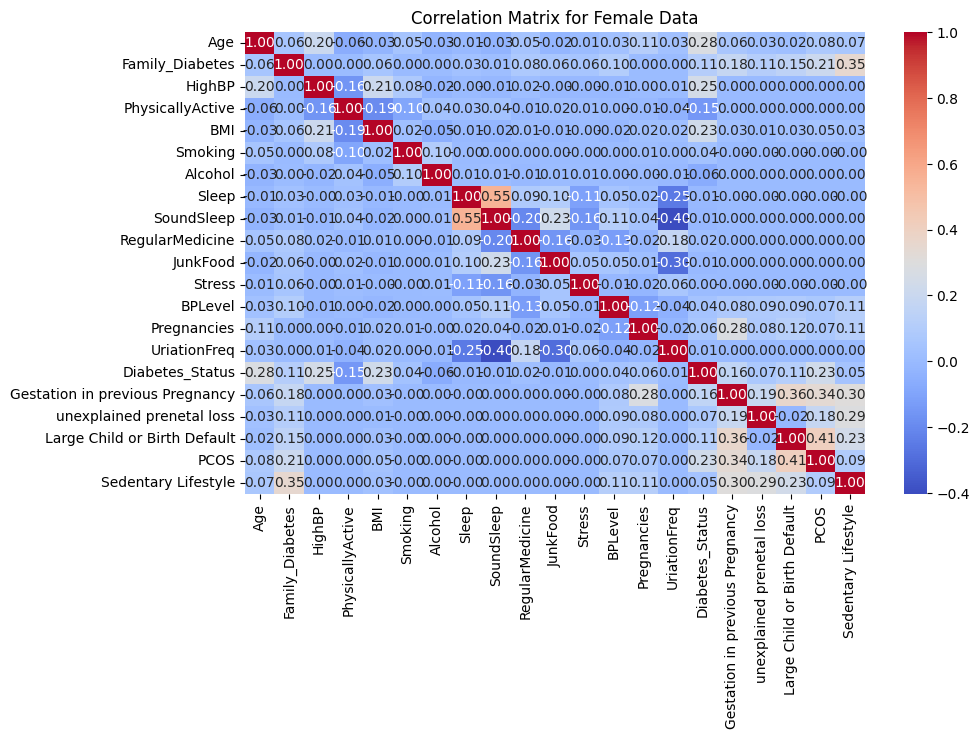

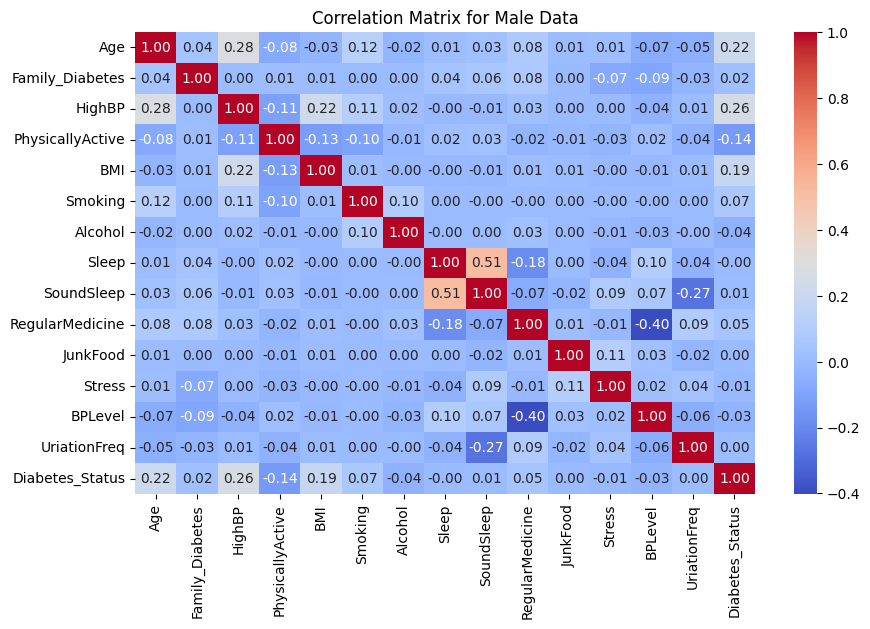

Class distribution in resampled female dataset:
Diabetes_Status
0.0    85873
2.0    85873
3.0    85873
1.0    85873
Name: count, dtype: int64

Class distribution in resampled male dataset:
Diabetes_Status
0.0    74635
2.0    74635
1.0    74635
Name: count, dtype: int64
[0]	validation_0-merror:0.31956	validation_1-merror:0.33272
[1]	validation_0-merror:0.31402	validation_1-merror:0.32573
[2]	validation_0-merror:0.31297	validation_1-merror:0.32354
[3]	validation_0-merror:0.30826	validation_1-merror:0.31718
[4]	validation_0-merror:0.30593	validation_1-merror:0.31421
[5]	validation_0-merror:0.30459	validation_1-merror:0.31374
[6]	validation_0-merror:0.30052	validation_1-merror:0.32116
[7]	validation_0-merror:0.30069	validation_1-merror:0.32190
[8]	validation_0-merror:0.29889	validation_1-merror:0.32823
[9]	validation_0-merror:0.29744	validation_1-merror:0.32561
[10]	validation_0-merror:0.29587	validation_1-merror:0.32187
[11]	validation_0-merror:0.29391	validation_1-merror:0.32335
[12]	val

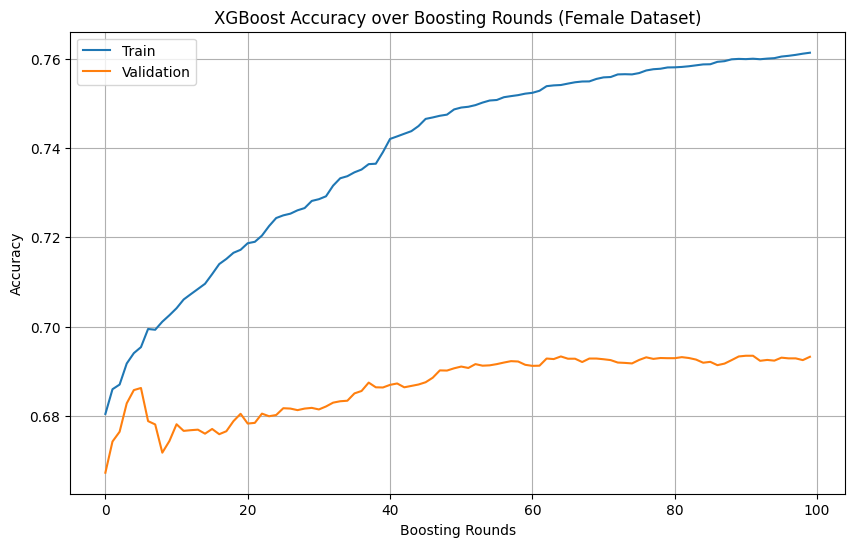

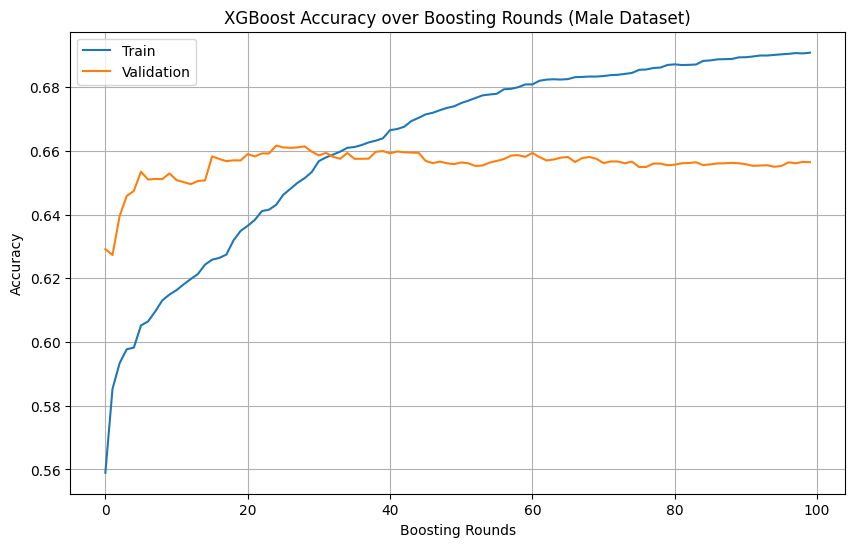

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
import numpy as np


# Assuming female_data and male_data are your DataFrames

# 1. Identify numerical and categorical columns for female data
female_numerical_cols = female_data.select_dtypes(include=['int64', 'float64']).columns
female_categorical_cols = female_data.select_dtypes(include=['object']).columns

# 2. Identify numerical and categorical columns for male data
male_numerical_cols = male_data.select_dtypes(include=['int64', 'float64']).columns
male_categorical_cols = male_data.select_dtypes(include=['object']).columns

# 3. Define the imputation strategies
numerical_imputer = SimpleImputer(strategy='mean')  # For numerical features (use 'median' if desired)
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical features

# 4. Column transformers for both datasets
female_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, female_numerical_cols),
        ('cat', categorical_imputer, female_categorical_cols)
    ])

male_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, male_numerical_cols),
        ('cat', categorical_imputer, male_categorical_cols)
    ])

# 5. Apply the imputations for the female dataset
female_data_imputed = pd.DataFrame(female_preprocessor.fit_transform(female_data),
                                   columns=female_numerical_cols.append(female_categorical_cols))

# 6. Apply the imputations for the male dataset
male_data_imputed = pd.DataFrame(male_preprocessor.fit_transform(male_data),
                                 columns=male_numerical_cols.append(male_categorical_cols))

# 7. Print Correlation Matrices of the imputed data using sns heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrices for female and male data
correlation_matrix_female = female_data_imputed.corr()
correlation_matrix_male = male_data_imputed.corr()

# Plot heatmaps for correlation matrices
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_female, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Female Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_male, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Male Data")
plt.show()

# Print the first few rows of the imputed datasets
# print(female_data_imputed.head())
# print(male_data_imputed.head())

# 7. Splitting the datasets into X and y
X_female = female_data_imputed.drop('Diabetes_Status', axis=1)
y_female = female_data_imputed['Diabetes_Status']

X_male = male_data_imputed.drop('Diabetes_Status', axis=1)
y_male = male_data_imputed['Diabetes_Status']


# 8. Train-Test Split for both datasets
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# 9. Apply SMOTE to the female dataset
smote = SMOTE(random_state=42)
X_female_resampled, y_female_resampled = smote.fit_resample(X_train_female, y_train_female)

# 10. Apply SMOTE to the male dataset
X_male_resampled, y_male_resampled = smote.fit_resample(X_train_male, y_train_male)


# Check class distribution in the resampled female dataset
female_class_distribution = y_female_resampled.value_counts()
print("Class distribution in resampled female dataset:")
print(female_class_distribution)

# Check class distribution in the resampled male dataset
male_class_distribution = y_male_resampled.value_counts()
print("\nClass distribution in resampled male dataset:")
print(male_class_distribution)


from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define the evaluation sets (training and validation)
eval_set_female = [(X_female_resampled, y_female_resampled), (X_test_female, y_test_female)]
eval_set_male = [(X_male_resampled, y_male_resampled), (X_test_male, y_test_male)]

# 11. Train XGBoost model on the resampled female dataset
xgb_female = XGBClassifier(random_state=42, eval_metric='merror')
xgb_female.fit(X_female_resampled, y_female_resampled, eval_set=eval_set_female, verbose=True)

# 12. Train XGBoost model on the resampled male dataset
xgb_male = XGBClassifier(random_state=42, eval_metric='merror')
xgb_male.fit(X_male_resampled, y_male_resampled, eval_set=eval_set_male, verbose=True)

# 13. Make predictions on the test set for the female dataset
y_pred_female = xgb_female.predict(X_test_female)

# 14. Make predictions on the test set for the male dataset
y_pred_male = xgb_male.predict(X_test_male)

# 15. Evaluate performance of the female model
print("Classification Report for Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

# 16. Evaluate performance of the male model
print("\nClassification Report for Male Dataset:")
print(classification_report(y_test_male, y_pred_male))


# Extract evaluation results
evals_result_female = xgb_female.evals_result()
evals_result_male = xgb_male.evals_result()

# Plot the training and validation loss over iterations (boosting rounds)
epochs_female = len(evals_result_female['validation_0']['merror'])  # or 'error' if used as metric
x_axis_female = range(0, epochs_female)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_0']['merror']), label='Train')
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Female Dataset)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the training and validation loss over iterations (boosting rounds)
epochs_male = len(evals_result_male['validation_0']['merror'])  # or 'error' if used as metric
x_axis_male = range(0, epochs_male)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_0']['merror']), label='Train')
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Male Dataset)')
plt.legend()
plt.grid(True)
plt.show()














Print Out Feature Importance of Both Datasets During Predictions


Feature Importance for Female Dataset:


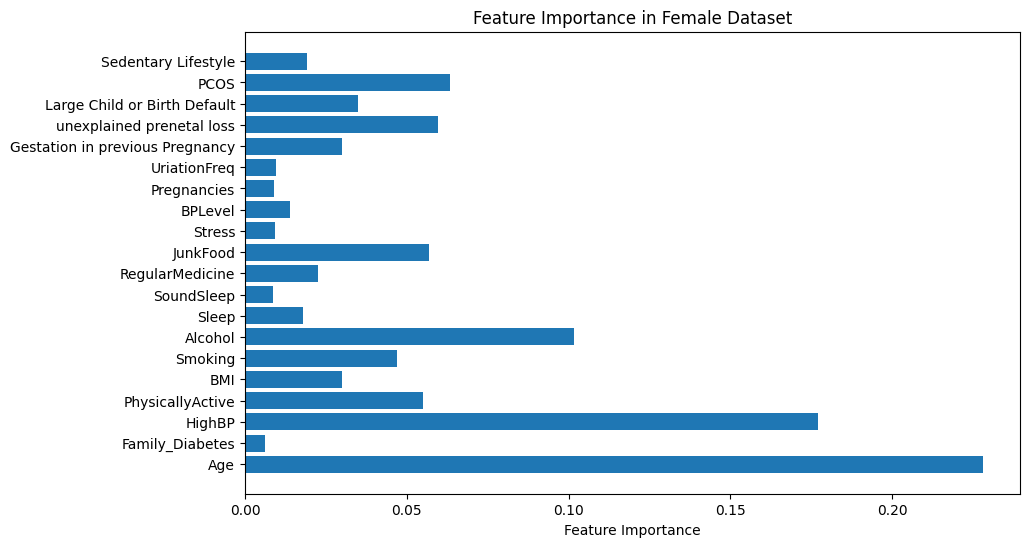


Feature Importance for Male Dataset:


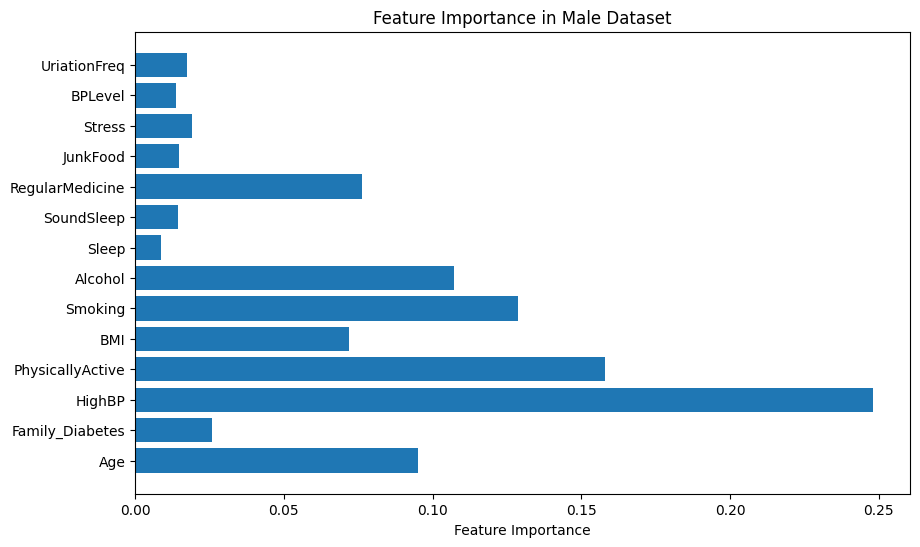

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 17. Feature Importance for Female Dataset
print("\nFeature Importance for Female Dataset:")
female_importances = xgb_female.feature_importances_

# Plot feature importance for female dataset
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(female_importances)), female_importances, align='center')
plt.yticks(np.arange(len(female_importances)), X_female.columns)  # Assuming you want to map feature names
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Female Dataset")
plt.show()

# 18. Feature Importance for Male Dataset
print("\nFeature Importance for Male Dataset:")
male_importances = xgb_male.feature_importances_

# Plot feature importance for male dataset
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(male_importances)), male_importances, align='center')
plt.yticks(np.arange(len(male_importances)), X_male.columns)  # Assuming you want to map feature names
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Male Dataset")
plt.show()

Training with Class Weights

[0]	validation_0-merror:0.31956	validation_1-merror:0.33272
[1]	validation_0-merror:0.31402	validation_1-merror:0.32573
[2]	validation_0-merror:0.31297	validation_1-merror:0.32354
[3]	validation_0-merror:0.30826	validation_1-merror:0.31718
[4]	validation_0-merror:0.30593	validation_1-merror:0.31421
[5]	validation_0-merror:0.30459	validation_1-merror:0.31374
[6]	validation_0-merror:0.30052	validation_1-merror:0.32116
[7]	validation_0-merror:0.30069	validation_1-merror:0.32190
[8]	validation_0-merror:0.29889	validation_1-merror:0.32823
[9]	validation_0-merror:0.29744	validation_1-merror:0.32561
[10]	validation_0-merror:0.29587	validation_1-merror:0.32187
[11]	validation_0-merror:0.29391	validation_1-merror:0.32335
[12]	validation_0-merror:0.29273	validation_1-merror:0.32319
[13]	validation_0-merror:0.29157	validation_1-merror:0.32308
[14]	validation_0-merror:0.29040	validation_1-merror:0.32397
[15]	validation_0-merror:0.28824	validation_1-merror:0.32292
[16]	validation_0-merror:0.28598	v

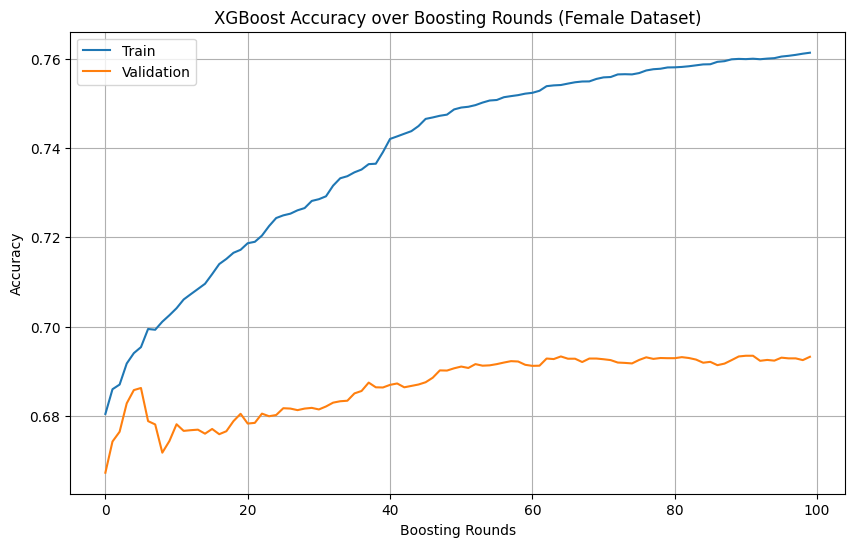

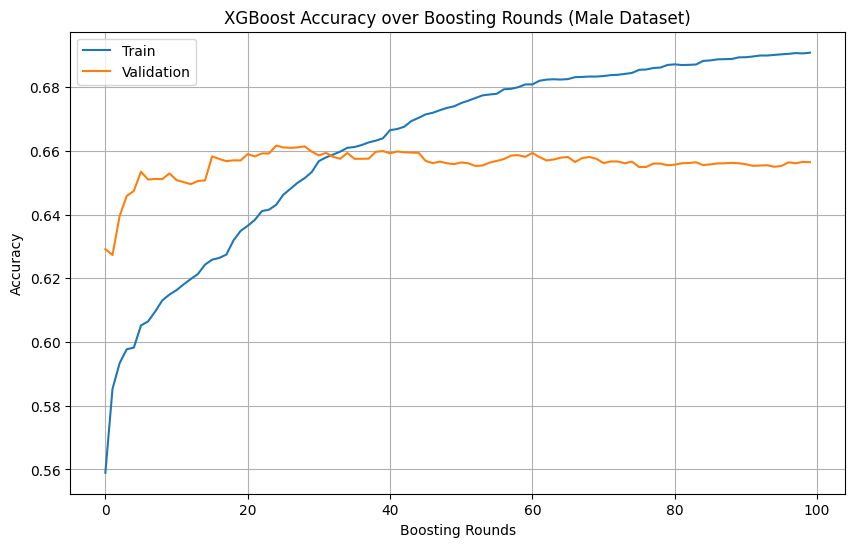

' This is the end of new code for assignment 3 and hands on 10/3'

In [ ]:
# Calculate class weights
from sklearn.utils.class_weight import compute_sample_weight

# 1. Calculate class weights for the female dataset
female_sample_weights = compute_sample_weight(class_weight='balanced', y=y_female_resampled)

# 2. Calculate class weights for the male dataset
male_sample_weights = compute_sample_weight(class_weight='balanced', y=y_male_resampled)


# Define the evaluation sets (training and validation)
eval_set_female = [(X_female_resampled, y_female_resampled), (X_test_female, y_test_female)]
eval_set_male = [(X_male_resampled, y_male_resampled), (X_test_male, y_test_male)]

# 3. Train XGBoost model on the resampled female dataset using sample_weight
xgb_female = XGBClassifier(random_state=42, eval_metric='merror')
xgb_female.fit(X_female_resampled, y_female_resampled, sample_weight=female_sample_weights, eval_set=eval_set_female, verbose=True)

# 4. Train XGBoost model on the resampled male dataset using sample_weight
xgb_male = XGBClassifier(random_state=42, eval_metric='merror')
xgb_male.fit(X_male_resampled, y_male_resampled, sample_weight=male_sample_weights, eval_set=eval_set_male, verbose=True)

# 5. Make predictions and evaluate as before
y_pred_female = xgb_female.predict(X_test_female)
y_pred_male = xgb_male.predict(X_test_male)

print("Classification Report for Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

print("\nClassification Report for Male Dataset:")
print(classification_report(y_test_male, y_pred_male))


# Extract evaluation results
evals_result_female = xgb_female.evals_result()
evals_result_male = xgb_male.evals_result()

# Plot the training and validation loss over iterations (boosting rounds)
epochs_female = len(evals_result_female['validation_0']['merror'])  # or 'error' if used as metric
x_axis_female = range(0, epochs_female)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_0']['merror']), label='Train')
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Female Dataset)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the training and validation loss over iterations (boosting rounds)
epochs_male = len(evals_result_male['validation_0']['merror'])  # or 'error' if used as metric
x_axis_male = range(0, epochs_male)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_0']['merror']), label='Train')
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Male Dataset)')
plt.legend()
plt.grid(True)
plt.show()

''' This is the end of new code for assignment 3 and hands on 10/3'''



RandomSearchCV with Comparison of Class Weights and SMOTE

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  11.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  11.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  11.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  11.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  14.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   2.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   2.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learnin

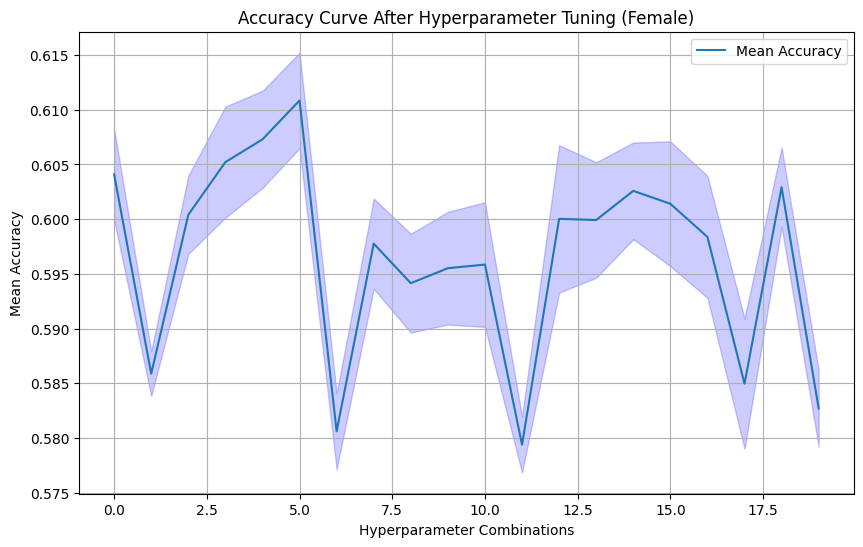

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   8.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   7.2s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   8.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   6.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   8.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learnin

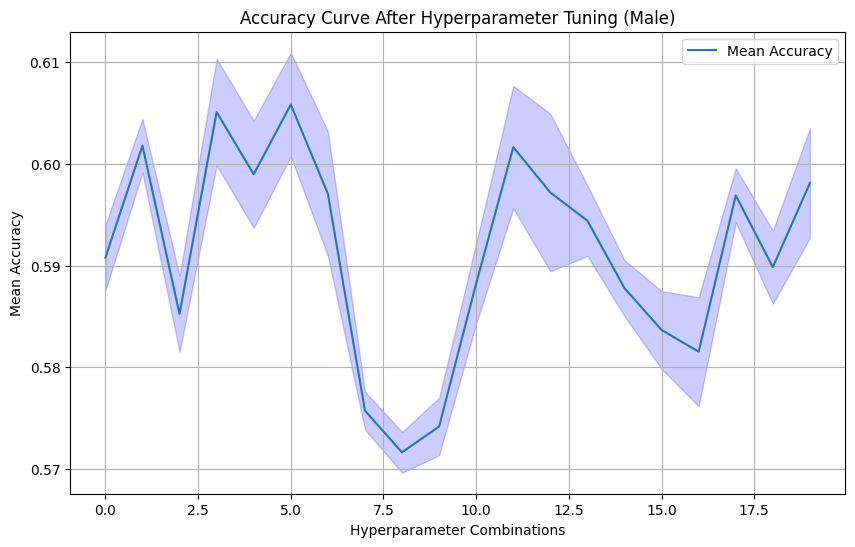

In [ ]:
# with class weights
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# import X_test_female, X_test_male, X_train_female, X_train_male, y_train_female, y_train_male, y_test_male, y_test_female fro csv files
X_train_female = pd.read_csv('X_train_female_before_impute.csv')
X_test_female = pd.read_csv('X_test_female_before_impute.csv')
X_train_male = pd.read_csv('X_train_male_before_impute.csv')
X_test_male = pd.read_csv('X_test_male_before_impute.csv')

y_train_female = pd.read_csv('y_train_female_before_impute.csv')
y_test_female = pd.read_csv('y_test_female_before_impute.csv')
y_train_male = pd.read_csv('y_train_male_before_impute.csv')
y_test_male = pd.read_csv('y_test_male_before_impute.csv')

# Ensure y_train and y_test are reshaped correctly
y_train_female = y_train_female.values.ravel()
y_test_female = y_test_female.values.ravel()
y_train_male = y_train_male.values.ravel()
y_test_male = y_test_male.values.ravel()



# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.1],     # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],          # Percentage of samples used per tree
    'colsample_bytree': [0.7, 0.8],   # Percentage of features used per tree
    'gamma': [0, 0.1, 0.3],           # Minimum loss reduction for further partitioning
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,                              # Number of parameter settings sampled
    scoring='accuracy',                  # Scoring metric for multiclass classification
    cv=5,                                   # 3-fold cross-validation
    verbose=2,
    random_state=42
)

from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights_female = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_female), y=y_train_female)

# Create a mapping from class label to weight
class_weight_dict_female = {cls: weight for cls, weight in zip(np.unique(y_train_female), class_weights_female)}

# Assign sample weights based on the class label
sample_weights_female = np.array([class_weight_dict_female[label] for label in y_train_female])

# Fit RandomizedSearchCV to the female dataset
random_search.fit(X_train_female, y_train_female, sample_weight=sample_weights_female)

# Best estimator after tuning
best_xgb_female = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Female Dataset:", random_search.best_params_)

# Evaluate the tuned model
y_pred_female = best_xgb_female.predict(X_test_female)
print("Classification Report for Tuned XGBoost on Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

# Extract cv_results_ after tuning
results = random_search.cv_results_

# Extract mean test scores and standard deviations for each combination
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, label='Mean Accuracy')
plt.fill_between(np.arange(len(mean_test_scores)),
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores, color='b', alpha=0.2)
plt.title('Accuracy Curve After Hyperparameter Tuning (Female)')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Calculate class weights
class_weights_male = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_male), y=y_train_male)

# Create a mapping from class label to weight
class_weight_dict_male = {cls: weight for cls, weight in zip(np.unique(y_train_male), class_weights_male)}

# Assign sample weights based on the class label
sample_weights_male = np.array([class_weight_dict_male[label] for label in y_train_male])

# Fit RandomizedSearchCV to the female dataset
random_search.fit(X_train_male, y_train_male, sample_weight=sample_weights_male)



# Best estimator after tuning
best_xgb_male = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Male Dataset:", random_search.best_params_)

# Evaluate the tuned model
y_pred_male = best_xgb_male.predict(X_test_male)
print("Classification Report for Tuned XGBoost on Male Dataset:")
print(classification_report(y_test_male, y_pred_male))

# Extract cv_results_ after tuning
results = random_search.cv_results_

# Extract mean test scores and standard deviations for each combination
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, label='Mean Accuracy')
plt.fill_between(np.arange(len(mean_test_scores)),
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores, color='b', alpha=0.2)
plt.title('Accuracy Curve After Hyperparameter Tuning (Male)')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  38.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  38.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  38.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  38.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  53.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=  15.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=  10.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learnin

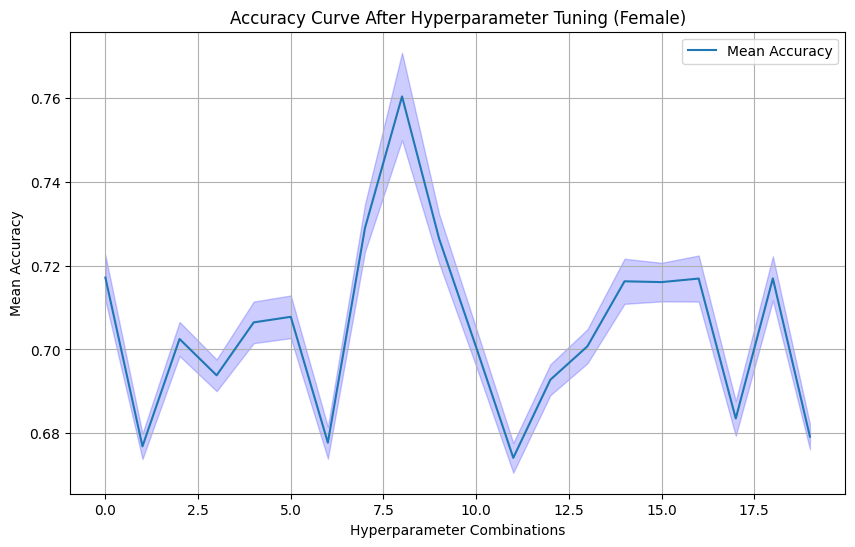

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  21.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  19.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  21.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  22.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=  19.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   6.2s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   4.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learnin

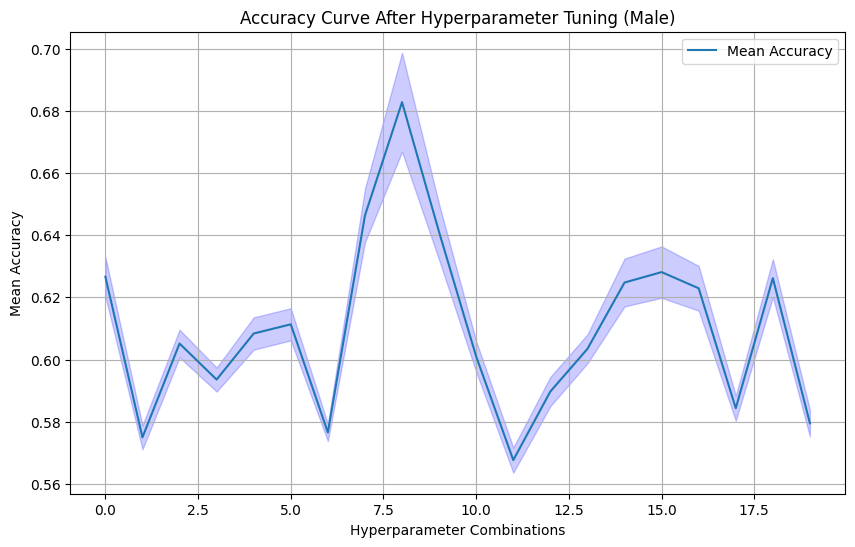

In [ ]:
# using SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Import train/test data from CSV files
X_train_female = pd.read_csv('X_train_female_before_impute.csv')
X_test_female = pd.read_csv('X_test_female_before_impute.csv')
X_train_male = pd.read_csv('X_train_male_before_impute.csv')
X_test_male = pd.read_csv('X_test_male_before_impute.csv')

y_train_female = pd.read_csv('y_train_female_before_impute.csv')
y_test_female = pd.read_csv('y_test_female_before_impute.csv')
y_train_male = pd.read_csv('y_train_male_before_impute.csv')
y_test_male = pd.read_csv('y_test_male_before_impute.csv')

# Ensure y_train and y_test are reshaped correctly
y_train_female = y_train_female.values.ravel()
y_test_female = y_test_female.values.ravel()
y_train_male = y_train_male.values.ravel()
y_test_male = y_test_male.values.ravel()

# Apply SMOTE to the training data for females
smote = SMOTE(random_state=42)
X_train_female_resampled, y_train_female_resampled = smote.fit_resample(X_train_female, y_train_female)

# Apply SMOTE to the training data for males
X_train_male_resampled, y_train_male_resampled = smote.fit_resample(X_train_male, y_train_male)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.1],     # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],          # Percentage of samples used per tree
    'colsample_bytree': [0.7, 0.8],   # Percentage of features used per tree
    'gamma': [0, 0.1, 0.3],           # Minimum loss reduction for further partitioning
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,                              # Number of parameter settings sampled
    scoring='accuracy',                     # Scoring metric for multiclass classification
    cv=5,                                   # 5-fold cross-validation
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the resampled female dataset
random_search.fit(X_train_female_resampled, y_train_female_resampled)

# Best estimator after tuning
best_xgb_female = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Female Dataset:", random_search.best_params_)

# Evaluate the tuned model
y_pred_female = best_xgb_female.predict(X_test_female)
print("Classification Report for Tuned XGBoost on Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

# Extract cv_results_ after tuning
results = random_search.cv_results_

# Extract mean test scores and standard deviations for each combination
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, label='Mean Accuracy')
plt.fill_between(np.arange(len(mean_test_scores)),
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores, color='b', alpha=0.2)
plt.title('Accuracy Curve After Hyperparameter Tuning (Female)')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Fit RandomizedSearchCV to the resampled male dataset
random_search.fit(X_train_male_resampled, y_train_male_resampled)

# Best estimator after tuning
best_xgb_male = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Male Dataset:", random_search.best_params_)

# Evaluate the tuned model
y_pred_male = best_xgb_male.predict(X_test_male)
print("Classification Report for Tuned XGBoost on Male Dataset:")
print(classification_report(y_test_male, y_pred_male))

# Extract cv_results_ after tuning
results = random_search.cv_results_

# Extract mean test scores and standard deviations for each combination
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, label='Mean Accuracy')
plt.fill_between(np.arange(len(mean_test_scores)),
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores, color='b', alpha=0.2)
plt.title('Accuracy Curve After Hyperparameter Tuning (Male)')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()
